## Prg 1

In [25]:
from collections import deque
class Graph:
    def __init__(self, adjac_lis):
        self.adjac_lis = adjac_lis
    def get_neighbors(self, v):
        return self.adjac_lis[v]
    def h(self, n):
        return {'A': 1, 'B': 1, 'C': 1, 'D': 1}[n]
    def a_star_algorithm(self, start, stop):
        open_lst, closed_lst, poo, par = {start}, set(), {start: 0}, {start: start}
        while open_lst:
            n = min(open_lst, key=lambda x: poo[x] + self.h(x))
            if n == stop:
                reconst_path = [n]
                while par[n] != n: 
                    n=par[n]
                    reconst_path.append(n)
                print(f'Path found: {reconst_path[::-1]}')
                return reconst_path[::-1]
            open_lst.remove(n)
            closed_lst.add(n)
            for m, weight in self.get_neighbors(n):
                if (m not in open_lst and m not in closed_lst) or (poo[m] > poo[n] + weight):
                    open_lst.add(m)
                    par[m], poo[m] = n, poo[n] + weight
                    if m in closed_lst: closed_lst.remove(m), open_lst.add(m)
        print('Path does not exist!')
        return None
adjac_lis = {'A': [('B', 1), ('C', 3), ('D', 7)], 'B': [('D', 5)], 'C': [('D', 12)]}
graph1 = Graph(adjac_lis)
graph1.a_star_algorithm('A', 'D')

Path found: ['A', 'B', 'D']


['A', 'B', 'D']

## Prg 3

In [26]:
import csv
with open("candidate.csv") as f:
    csv_file = csv.reader(f)
    data = list(csv_file)
    specific = data[0][:-1]
    general = [['?' for i in range(len(specific))] for j in range(len(specific))]
    for i in data:
        if i[-1] == "Yes":
            for j in range(len(specific)):
                if i[j] != specific[j]:
                    specific[j] = "?"
                    general[j][j] = "?"
        elif i[-1] == "No":
            for j in range(len(specific)):
                if i[j] != specific[j]:
                    general[j][j] = specific[j]
                else:
                    general[j][j] = "?"
        print("\nStep " + str(data.index(i)+1) + " of Candidate Elimination Algorithm")
        print(specific)
        print(general)
    gh = [] # gh = general Hypothesis
    for i in general:
        for j in i:
            if j != '?':
                gh.append(i)
                break
    print("\nFinal Specific hypothesis:\n", specific)
    print("\nFinal General hypothesis:\n", gh)


Step 1 of Candidate Elimination Algorithm
['sunny', 'warm', 'normal', 'strong', 'warm', 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 2 of Candidate Elimination Algorithm
['sunny', 'warm', 'normal', 'strong', 'warm', 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 3 of Candidate Elimination Algorithm
['sunny', 'warm', 'normal', 'strong', 'warm', 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 2 of Candidate Elimination Algorithm
['sunny', 'warm', 'normal', 'strong', 'warm', 'same']
[['?', '?', '?', '?', '?', '?'], 

## Prg 4

In [27]:
import pandas as pd
from pprint import pprint
from sklearn.feature_selection import mutual_info_classif
from collections import Counter
def id3(df, target_attribute, attribute_names, default_class=None):
    cnt=Counter(x for x in df[target_attribute])
    if len(cnt)==1:
        return next(iter(cnt))
    elif df.empty or (not attribute_names):
        return default_class
    else:
        gainz = mutual_info_classif(df[attribute_names],df[target_attribute],discrete_features=True)
        index_of_max=gainz.tolist().index(max(gainz))
        best_attr=attribute_names[index_of_max]
        tree={best_attr:{}}
        remaining_attribute_names=[i for i in attribute_names if i!=best_attr]
        for attr_val, data_subset in df.groupby(best_attr):
            subtree=id3(data_subset, target_attribute, remaining_attribute_names,default_class)
            tree[best_attr][attr_val]=subtree
        return tree
df=pd.read_csv("Tennis.csv")
attribute_names=df.columns.tolist()
print("List of attribut name")
attribute_names.remove("PlayTennis")
for colname in df.select_dtypes("object"):
    df[colname], _ = df[colname].factorize()
print(df)
tree= id3(df,"PlayTennis", attribute_names)
print("The tree structure")
pprint(tree)

List of attribut name
    Outlook  Temperature  Humidity  Wind  PlayTennis
0         0            0         0     0           0
1         0            0         0     1           0
2         1            0         0     0           1
3         2            1         0     0           1
4         2            2         1     0           1
5         2            2         1     1           0
6         1            2         1     1           1
7         0            1         0     0           0
8         0            2         1     0           1
9         2            1         1     0           1
10        0            1         1     1           1
11        3            1         0     1           1
12        1            1         1     0           1
13        2            1         0     1           0
The tree structure
{'Outlook': {0: {'Humidity': {0: 0, 1: 1}},
             1: 1,
             2: {'Wind': {0: 1, 1: 0}},
             3: 1}}


## Prg 5

In [15]:
import numpy as np
X=np.array(([2,9],[1,5],[3,6]),dtype=float)
y=np.array(([92],[86],[89]),dtype=float)
X=X/np.amax(X,axis=0)
y=y/100
def sigmoid(x):
    return 1/(1+np.exp(-x))
def derivatives_sigmoid(x):
    return x*(1-x)
epoch=7000
lr=0.25
inputlayer_neurons=2
hiddenlayer_neurons=3
output_neurons=1
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))
for i in range(epoch):
    hinp1=np.dot(X,wh)
    hinp=hinp1+bh
    hlayer_act=sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp=outinp1+bout
    output=sigmoid(outinp)
    EO=y-output
    outgrad=derivatives_sigmoid(output)
    d_output=EO*outgrad
    EH=d_output.dot(wout.T)
    hiddengrad=derivatives_sigmoid(hlayer_act)
    d_hiddenlayer=EH*hiddengrad
    wout+=hlayer_act.T.dot(d_output)*lr
    wh+=X.T.dot(d_hiddenlayer)*lr
print("Input=\n"+str(X))
print("Actual output:\n"+str(y))
print("predicated output:",output)

Input=
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual output:
[[0.92]
 [0.86]
 [0.89]]
predicated output: [[0.89467901]
 [0.88398996]
 [0.89155782]]


## Prg 6

In [29]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
data = pd.read_csv('Tennis.csv')
print("The first 5 Values of data is :\n", data.head())
X = data.iloc[:, :-1]
print("\nThe First 5 values of the train data is\n", X.head())
y = data.iloc[:, -1]
print("\nThe First 5 values of train output is\n", y.head())
le_Outlook = LabelEncoder()
X.Outlook = le_Outlook.fit_transform(X.Outlook)
le_Temperature = LabelEncoder()
X.Temperature = le_Temperature.fit_transform(X.Temperature)
le_Humidity = LabelEncoder()
X.Humidity = le_Humidity.fit_transform(X.Humidity)
le_Wind = LabelEncoder()
X.Wind = le_Wind.fit_transform(X.Wind)
print("\nNow the Train output is\n", X.head())
le_PlayTennis = LabelEncoder()
y = le_PlayTennis.fit_transform(y)
print("\nNow the Train output is\n",y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)
classifier = GaussianNB()
classifier.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
print("Accuracy is:", accuracy_score(classifier.predict(X_test), y_test))

The first 5 Values of data is :
     Outlook Temperature Humidity    Wind PlayTennis
0     Sunny         Hot     High    Weak         No
1     Sunny         Hot     High  Strong         No
2  Overcast         Hot     High    Weak        Yes
3      Rain        Mild     High    Weak        Yes
4      Rain        Cool   Normal    Weak        Yes

The First 5 values of the train data is
     Outlook Temperature Humidity    Wind
0     Sunny         Hot     High    Weak
1     Sunny         Hot     High  Strong
2  Overcast         Hot     High    Weak
3      Rain        Mild     High    Weak
4      Rain        Cool   Normal    Weak

The First 5 values of train output is
 0     No
1     No
2    Yes
3    Yes
4    Yes
Name: PlayTennis, dtype: object

Now the Train output is
    Outlook  Temperature  Humidity  Wind
0        2            1         0     1
1        2            1         0     0
2        0            1         0     1
3        1            2         0     1
4        1            0 

C:\Users\moham\AppData\Local\Temp\ipykernel_20340\2606055562.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Outlook = le_Outlook.fit_transform(X.Outlook)
C:\Users\moham\AppData\Local\Temp\ipykernel_20340\2606055562.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Temperature = le_Temperature.fit_transform(X.Temperature)
C:\Users\moham\AppData\Local\Temp\ipykernel_20340\2606055562.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

## Prg 7

In [30]:
from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
print(iris)
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target)
model =KMeans(n_clusters=3)
model.fit(X_train,y_train)
model.score
print('K-Mean: ',metrics.accuracy_score(y_test,model.predict(X_test)))
#-------Expectation and Maximization----------
from sklearn.mixture import GaussianMixture
model2 = GaussianMixture(n_components=3)
model2.fit(X_train,y_train)
model2.score
print('EM Algorithm:',metrics.accuracy_score(y_test,model2.predict(X_test)))

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-Mean:  0.13157894736842105
EM Algorithm: 1.0


C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Alternate Prg 7

C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


The accuracy score of K-Mean:  0.24
The Confusion matrixof K-Mean:
 [[ 0 50  0]
 [48  0  2]
 [14  0 36]]
The accuracy score of EM:  0.3333333333333333
The Confusion matrix of EM:
  [[ 0 50  0]
 [45  0  5]
 [ 0  0 50]]


C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


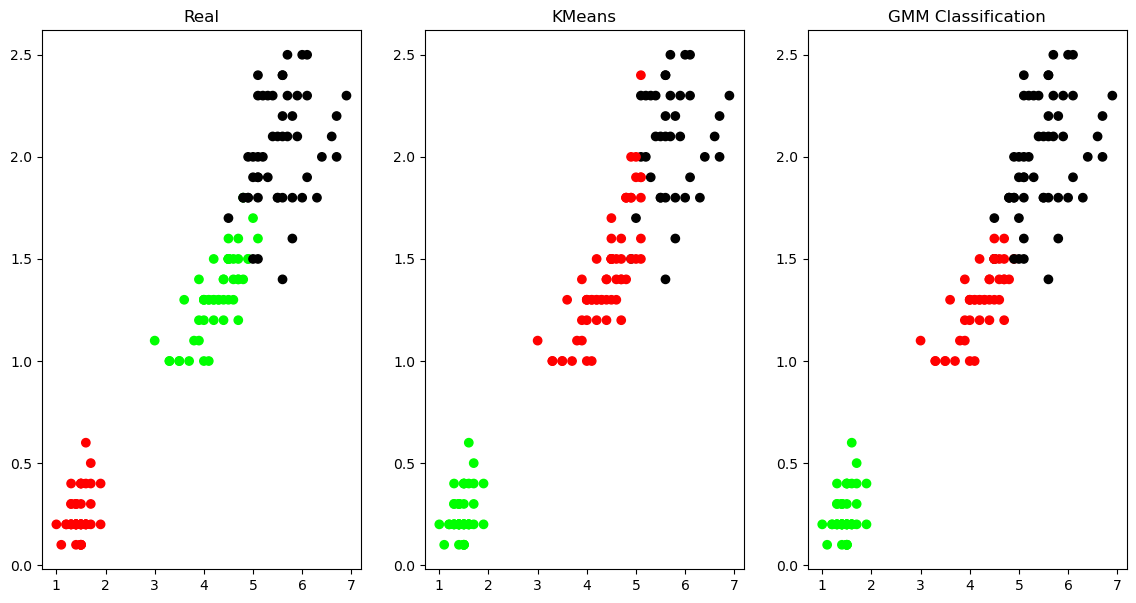

In [32]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import sklearn.metrics as metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width', 'Class']

dataset = pd.read_csv("8-dataset.csv", names=names)

X = dataset.iloc[:, :-1]  

label = {'Iris-setosa': 0,'Iris-versicolor': 1, 'Iris-virginica': 2} 

y = [label[c] for c in dataset.iloc[:, -1]]

plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])

# REAL PLOT
plt.subplot(1,3,1)
plt.title('Real')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y])

# K-PLOT
model=KMeans(n_clusters=3, random_state=0).fit(X)
plt.subplot(1,3,2)
plt.title('KMeans')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[model.labels_])

print('The accuracy score of K-Mean: ',metrics.accuracy_score(y, model.labels_))
print('The Confusion matrixof K-Mean:\n',metrics.confusion_matrix(y, model.labels_))

# GMM PLOT
gmm=GaussianMixture(n_components=3, random_state=0).fit(X)
y_cluster_gmm=gmm.predict(X)
plt.subplot(1,3,3)
plt.title('GMM Classification')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm])

print('The accuracy score of EM: ',metrics.accuracy_score(y, y_cluster_gmm))
print('The Confusion matrix of EM:\n ',metrics.confusion_matrix(y, y_cluster_gmm))

## Prg 8

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
iris=datasets.load_iris()
print("Iris Data set loaded...")
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.1)
#random_state=0
for i in range(len(iris.target_names)):
    print("Label", i , "-",str(iris.target_names[i]))
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
print("Results of Classification using K-nn with K=5 ")
for r in range(0,len(x_test)):
    print(" Sample:", str(x_test[r]), " Actual-label:", str(y_test[r])," Predicted-label:", str(y_pred[r]))
    print("Classification Accuracy :" , classifier.score(x_test,y_test));

Iris Data set loaded...
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Results of Classification using K-nn with K=5 
 Sample: [5.5 2.4 3.7 1. ]  Actual-label: 1  Predicted-label: 1
Classification Accuracy : 1.0
 Sample: [5.5 2.4 3.8 1.1]  Actual-label: 1  Predicted-label: 1
Classification Accuracy : 1.0
 Sample: [6.7 3.3 5.7 2.5]  Actual-label: 2  Predicted-label: 2
Classification Accuracy : 1.0
 Sample: [5.9 3.  5.1 1.8]  Actual-label: 2  Predicted-label: 2
Classification Accuracy : 1.0
 Sample: [7.2 3.2 6.  1.8]  Actual-label: 2  Predicted-label: 2
Classification Accuracy : 1.0
 Sample: [5.5 3.5 1.3 0.2]  Actual-label: 0  Predicted-label: 0
Classification Accuracy : 1.0
 Sample: [6.7 3.1 5.6 2.4]  Actual-label: 2  Predicted-label: 2
Classification Accuracy : 1.0
 Sample: [4.7 3.2 1.6 0.2]  Actual-label: 0  Predicted-label: 0
Classification Accuracy : 1.0
 Sample: [6.  2.9 4.5 1.5]  Actual-label: 1  Predicted-label: 1
Classification Accuracy : 1.0
 Sample: [5.5 2.3 4.  1.3

## Prg 9

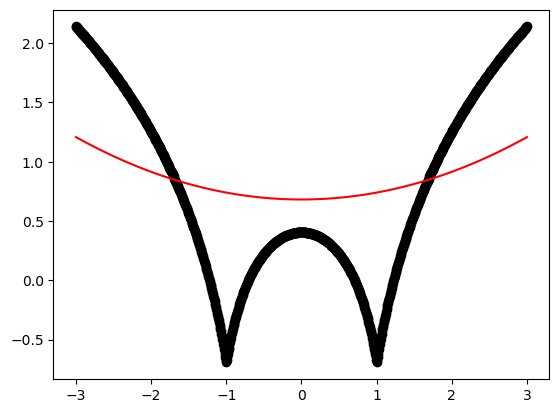

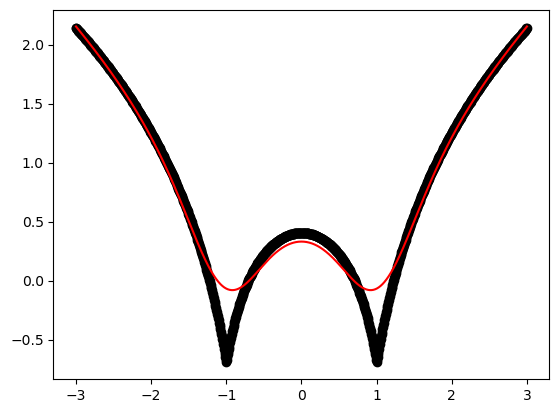

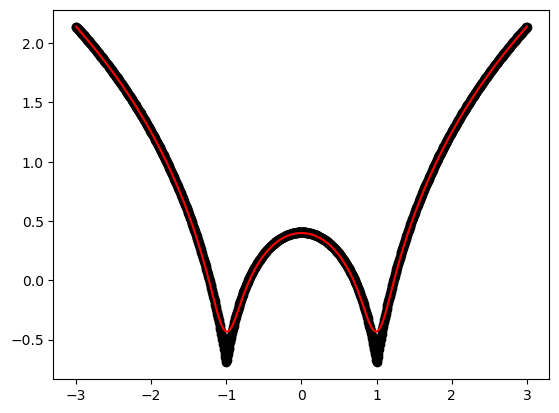

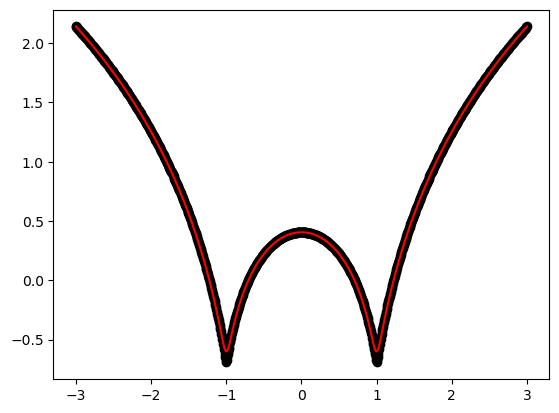

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def local_regression(x0, X, Y, tau):
    x0 = [1, x0]   
    X = [[1, i] for i in X]
    X = np.asarray(X)
    xw = (X.T) * np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau))
    beta = np.linalg.pinv(xw @ X) @ xw @ Y @ x0  
    return beta    

def draw(tau):
    prediction = [local_regression(x0, X, Y, tau) for x0 in domain]
    plt.plot(X, Y, 'o', color='black')
    plt.plot(domain, prediction, color='red')
    plt.show()

X = np.linspace(-3, 3, num=1000)
domain = X
Y = np.log(np.abs(X ** 2 - 1) + .5)

draw(10)
draw(0.1)
draw(0.01)
draw(0.001)